In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Extras/Medicinalplantdataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Medicinal plant dataset/Avacado/5644.jpg  
  inflating: Medicinal plant dataset/Avacado/5645.jpg  
  inflating: Medicinal plant dataset/Avacado/5646.jpg  
  inflating: Medicinal plant dataset/Avacado/5647.jpg  
  inflating: Medicinal plant dataset/Avacado/5648.jpg  
  inflating: Medicinal plant dataset/Avacado/5649.jpg  
  inflating: Medicinal plant dataset/Avacado/5650.jpg  
  inflating: Medicinal plant dataset/Avacado/5651.jpg  
  inflating: Medicinal plant dataset/Avacado/5652.jpg  
  inflating: Medicinal plant dataset/Avacado/5653.jpg  
  inflating: Medicinal plant dataset/Avacado/5654.jpg  
  inflating: Medicinal plant dataset/Avacado/5655.jpg  
  inflating: Medicinal plant dataset/Avacado/5656.jpg  
  inflating: Medicinal plant dataset/Avacado/5657.jpg  
  inflating: Medicinal plant dataset/Avacado/5658.jpg  
  inflating: Medicinal plant dataset/Avacado/5659.jpg  
  inflating: Medicinal plant dataset/Avacado/5660.jpg

In [4]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Flatten, Dense, Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.applications.densenet import DenseNet121

In [5]:
dataset = '/content/Medicinal plant dataset'

In [6]:
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, brightness_range=[0.2, 1.0], horizontal_flip=True,validation_split=0.2)

In [7]:
train_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='training', shuffle=True)
test_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='validation', shuffle=True)

Found 4765 images belonging to 40 classes.
Found 1180 images belonging to 40 classes.


In [8]:
input = Input(shape=(224, 224, 3))
model = keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=input)
model.trainable=True

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
output = model.output
x = Flatten()(output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(40, activation='softmax')(x)

In [10]:
model = keras.Model(inputs=input, outputs=x)

In [11]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [12]:
callbacks = [checkpoint]

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.09)

model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(), optimizer='SGD', metrics=['accuracy'])

history = model.fit(train_imgs, epochs=30,
                    validation_data=test_imgs,
                    callbacks=callbacks
                    )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 839ms/step - accuracy: 0.0272 - loss: 3.7929
Epoch 1: val_accuracy improved from -inf to 0.04746, saving model to best_model.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.0272 - loss: 3.7924 - val_accuracy: 0.0475 - val_loss: 3.6600
Epoch 2/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.0470 - loss: 3.6395
Epoch 2: val_accuracy improved from 0.04746 to 0.15508, saving model to best_model.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 169s 760ms/step - accuracy: 0.0471 - loss: 3.6392 - val_accuracy: 0.1551 - val_loss: 3.2065
Epoch 3/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.1447 - loss: 3.2105
Epoch 3: val_accuracy improved from 0.15508 to 0.16441, saving model to best_model.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 137s 730ms/step - accuracy: 0.1450 - loss: 3.2094 - val_accuracy: 0.1644 - val_loss: 3.1574
Epoch 4/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.3124 - loss: 2.5094
Epoch 4: val_accuracy improved from

In [ ]:
train_imgs.class_indices

{'Aloevera': 0,
 'Amla': 1,
 'Amruta_Balli': 2,
 'Arali': 3,
 'Ashoka': 4,
 'Ashwagandha': 5,
 'Avacado': 6,
 'Bamboo': 7,
 'Basale': 8,
 'Betel': 9,
 'Betel_Nut': 10,
 'Brahmi': 11,
 'Castor': 12,
 'Curry_Leaf': 13,
 'Doddapatre': 14,
 'Ekka': 15,
 'Ganike': 16,
 'Gauva': 17,
 'Geranium': 18,
 'Henna': 19,
 'Hibiscus': 20,
 'Honge': 21,
 'Insulin': 22,
 'Jasmine': 23,
 'Lemon': 24,
 'Lemon_grass': 25,
 'Mango': 26,
 'Mint': 27,
 'Nagadali': 28,
 'Neem': 29,
 'Nithyapushpa': 30,
 'Nooni': 31,
 'Pappaya': 32,
 'Pepper': 33,
 'Pomegranate': 34,
 'Raktachandini': 35,
 'Rose': 36,
 'Sapota': 37,
 'Tulasi': 38,
 'Wood_sorel': 39}

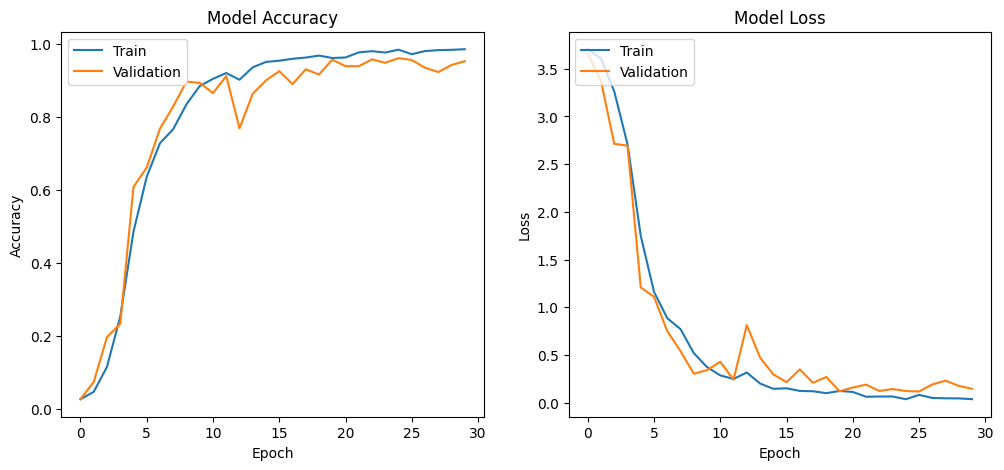

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [13]:
plants_model = keras.models.load_model('/content/best_model.keras')
plants_model.save('/content/drive/MyDrive/Extras/VGG16.keras')

In [ ]:
import keras.backend as k
k.clear_session()